<h1>Data Profiling</h1><h2 align="center">Data Dimensionality</h2>

In [10]:
from pandas import read_csv, DataFrame

filename = "../../../data/class_pos_covid.csv"
file_tag = "health"

# filename = "../../../data/class_credit_score.csv"
# file_tag = "service"
data: DataFrame = read_csv(filename, na_values="")

data.shape

(380932, 40)

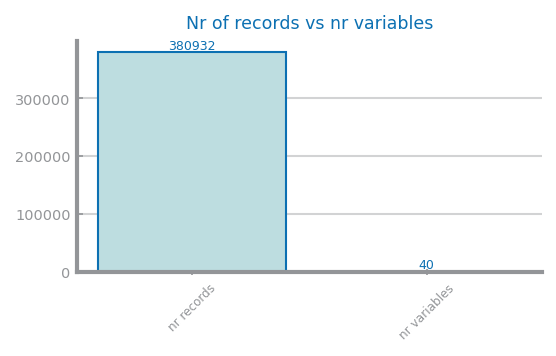

In [11]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
savefig(f"images/{file_tag}_records_variables.png", bbox_inches='tight')
show()

<h3>Missing values</h3>

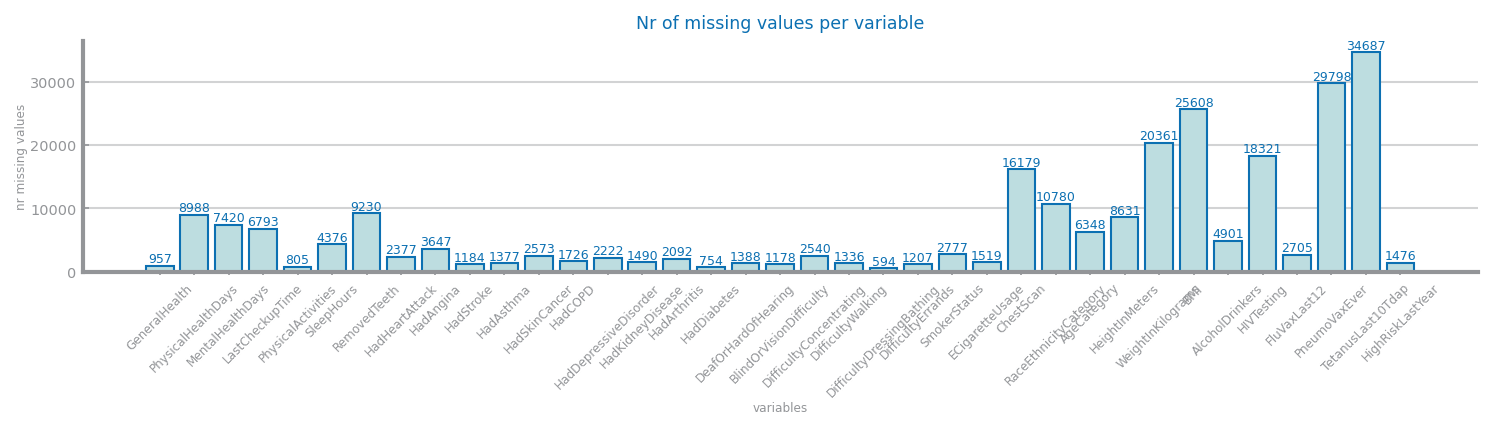

In [12]:
mv: dict[str, int] = {}
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure(figsize=(12, 2))
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
savefig(f"images/{file_tag}_mv.png", bbox_inches='tight')
show()

<h3>Variables Type</h3>

In [13]:
data.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

In [14]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
            try:
                to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
            except ValueError:
                try:
                    df[c] = to_datetime(df[c], errors="raise")
                    variable_types["date"].append(c)
                except ValueError:
                    variable_types["symbolic"].append(c)

    return variable_types

{'numeric': ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI'], 'binary': ['Sex', 'PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos'], 'date': [], 'symbolic': ['State', 'GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory', 'TetanusLast10Tdap']}


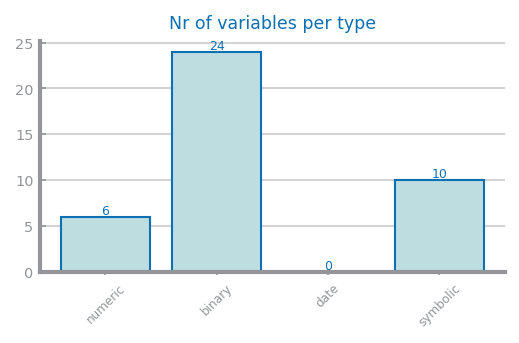

In [15]:
variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
savefig(f"images/{file_tag}_variable_types.png", bbox_inches='tight')
show()

In [16]:
symbolic: list[str] = variable_types["symbolic"]
data[symbolic] = data[symbolic].apply(lambda x: x.astype("category"))
data.dtypes

State                        category
Sex                            object
GeneralHealth                category
PhysicalHealthDays            float64
MentalHealthDays              float64
LastCheckupTime              category
PhysicalActivities             object
SleepHours                    float64
RemovedTeeth                 category
HadHeartAttack                 object
HadAngina                      object
HadStroke                      object
HadAsthma                      object
HadSkinCancer                  object
HadCOPD                        object
HadDepressiveDisorder          object
HadKidneyDisease               object
HadArthritis                   object
HadDiabetes                  category
DeafOrHardOfHearing            object
BlindOrVisionDifficulty        object
DifficultyConcentrating        object
DifficultyWalking              object
DifficultyDressingBathing      object
DifficultyErrands              object
SmokerStatus                 category
ECigaretteUs